### **Food Delivery Time Prediction**

 Food Delivery services like Zomato and Swiggy need to show the accurate time it will take to deliver your order to keep transparency with their customers. These companies use Machine Learning algorithms to predict the food delivery time based on how much time the delivery partners took for the same distance in the past. So, if you want to learn how to use Machine Learning for food delivery time prediction, this article is for you. This article will take you through food delivery time prediction with Machine Learning using Python.

To predict the food delivery time in real-time, we need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, we need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance.

So, for this task, we need a dataset containing data about the time taken by delivery partners to deliver food from the restaurant to the delivery location. I found an ideal dataset with all the features for this task. You can download the dataset from here.

In the section below, I will take you through the task of Food Delivery Time Prediction with Machine Learning using Python.

In [2]:
# Set the woring directory

import os
os.chdir(r'C:\Users\prajw\OneDrive\Desktop\Zomato')

In [4]:
# Import the packages

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read the data

data = pd.read_csv('deliverytime.txt')

In [6]:
# Peak into data

data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [7]:
# Shape

data.shape

(45593, 11)

In [8]:
# Check for null values

data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [11]:
# check for duplicates

data.duplicated().any()

False

In [12]:
# Datatypes

data.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age              int64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Type_of_order                   object
Type_of_vehicle                 object
Time_taken(min)                  int64
dtype: object

In [13]:
# Summary statistics

data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


Calculating Distance Between Two Latitudes and Longitudes
The dataset doesn’t have any feature that shows the difference between the restaurant and the delivery location. All we have are the latitude and longitude points of the restaurant and the delivery location. We can use the haversine formula to calculate the distance between two locations based on their latitudes and longitudes.

In [20]:
# Feature Engineering.

# We have to create new feature  - Distance (Distance between Restaurant and Delivery Location in Kilometers).
# We are using Haversine Formula to calculate distance between two points.

R = 6371     # Radius of Earth in KM

# Convert degree to Radians

def degree_to_radians(degrees):
    return degrees * (np.pi / 180)

# Function to calculate Haversine Distance between two points

def calculate_distance(lat1, lon1, lat2, lon2):
    d_lat = degree_to_radians(lat2-lat1)
    d_lon = degree_to_radians(lon2-lon1)
    a = np.sin(d_lat/2)**2 + np.cos(degree_to_radians(lat1)) * np.cos(degree_to_radians(lat2)) * np.sin(d_lon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    return R * c

# Calculate distance for each data point

data['Distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'Distance'] = calculate_distance(data.loc[i, 'Restaurant_latitude'],
                                                 data.loc[i, 'Restaurant_longitude'],
                                                 data.loc[i, 'Delivery_location_latitude'],
                                                 data.loc[i, 'Delivery_location_longitude'])
    

In [21]:
# New feature

data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


Text(0.5, 1.0, 'Distance V/s Time taken')

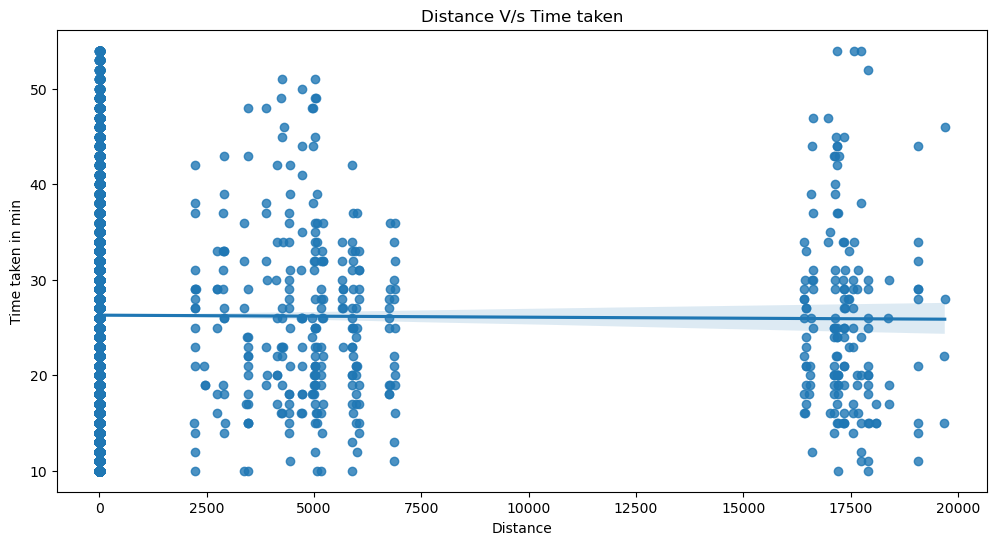

In [23]:
# Data Exploration

plt.figure(figsize=(12,6))

sns.regplot(data=data, x = 'Distance', y = 'Time_taken(min)')
plt.xlabel('Distance')
plt.ylabel('Time taken in min')
plt.title('Distance V/s Time taken')

Text(0.5, 1.0, 'Delivery person age V/s Time taken in min')

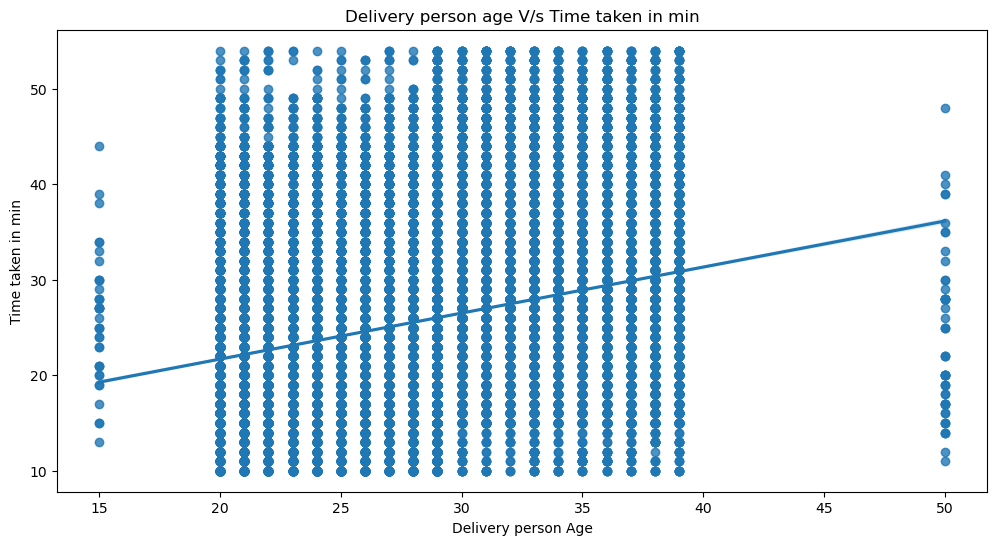

In [24]:
# Age V/s Time taken

plt.figure(figsize=(12,6))

sns.regplot(data=data, x = 'Delivery_person_Age', y = 'Time_taken(min)')
plt.xlabel('Delivery person Age')
plt.ylabel('Time taken in min')
plt.title('Delivery person age V/s Time taken in min')

Text(0.5, 1.0, 'Delivery person ratings V/s Time taken in min')

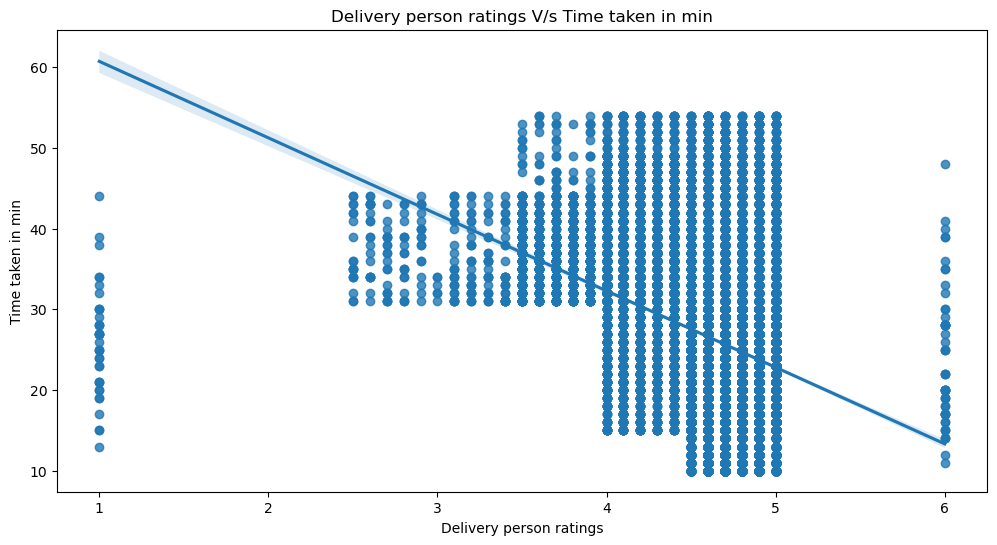

In [25]:
# Ratings V/s Time taken

plt.figure(figsize=(12,6))

sns.regplot(data=data, x = 'Delivery_person_Ratings', y = 'Time_taken(min)')
plt.xlabel('Delivery person ratings')
plt.ylabel('Time taken in min')
plt.title('Delivery person ratings V/s Time taken in min')

Text(0.5, 1.0, 'Type of vehicle V/s Time taken in min')

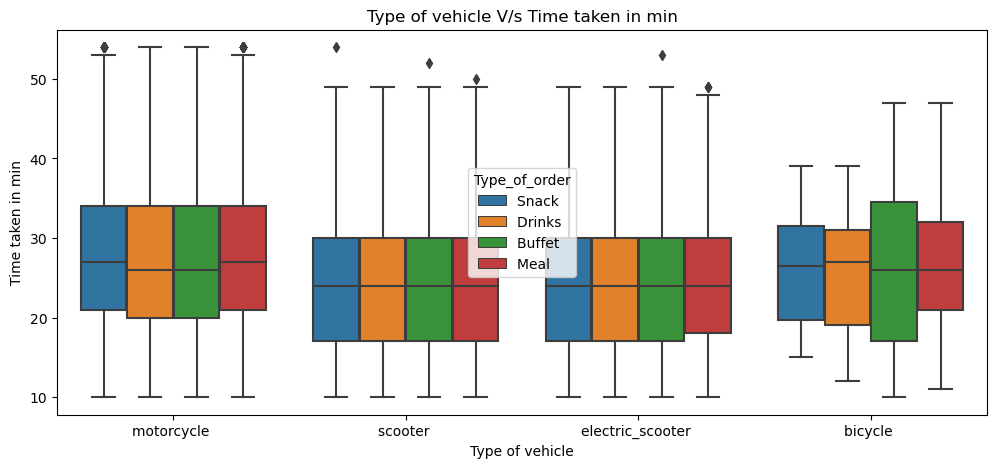

In [28]:
# Ratings V/s Time taken

plt.figure(figsize=(12,5))

sns.boxplot(data=data, x = 'Type_of_vehicle', y = 'Time_taken(min)', hue = 'Type_of_order')
plt.xlabel('Type of vehicle')
plt.ylabel('Time taken in min')
plt.title('Type of vehicle V/s Time taken in min')

So the features that contribute most to the food delivery time based on our analysis are:

- age of the delivery partner
- ratings of the delivery partner
- distance between the restaurant and the delivery location

In the section below, I will take you through how to train a Machine Learning model for food delivery time prediction.

In [30]:
# Correlation

cor = data.corr()
cor

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min),Distance
Delivery_person_Age,1.000000,-0.067449,-0.001955,-0.006796,0.002359,-0.000593,0.292708,0.014243
Delivery_person_Ratings,-0.067449,1.000000,-0.004846,-0.011147,-0.010198,-0.013350,-0.331103,-0.006230
Restaurant_latitude,-0.001955,-0.004846,1.000000,0.661784,0.866378,0.602713,0.013981,-0.369276
Restaurant_longitude,-0.006796,-0.011147,0.661784,1.000000,0.632293,0.915026,0.007821,-0.354461
Delivery_location_latitude,0.002359,-0.010198,0.866378,0.632293,1.000000,0.690515,0.014243,0.029975
Delivery_location_longitude,-0.000593,-0.013350,0.602713,0.915026,0.690515,1.000000,0.007625,0.027160
Time_taken(min),0.292708,-0.331103,0.013981,0.007821,0.014243,0.007625,1.000000,-0.002508
Distance,0.014243,-0.006230,-0.369276,-0.354461,0.029975,0.027160,-0.002508,1.000000


Now let’s train a Machine Learning model using an LSTM neural network model for the task of food delivery time prediction:

In [36]:
# Model training 

from sklearn.model_selection import train_test_split

x = np.array(data[['Delivery_person_Age',
                    'Delivery_person_Ratings',
                    'Distance']])

y = np.array(data['Time_taken(min)'])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,  test_size=0.10, random_state=42)

In [39]:
# LSTM Netwrok

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

model = Sequential()

model.add(LSTM(128, return_sequences= True, input_shape = (xtrain.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 3, 128)            66560     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Train the model

model.compile(optimizer= 'adam', loss= 'mean_squared_error')

model.fit(xtrain, ytrain, batch_size= 1, epochs= 10)

Epoch 1/10
41033/41033 [==============================] - 268s 6ms/step - loss: 69.2408
Epoch 2/10
41033/41033 [==============================] - 277s 7ms/step - loss: 63.5526
Epoch 3/10
41033/41033 [==============================] - 289s 7ms/step - loss: 61.3352
Epoch 4/10
41033/41033 [==============================] - 300s 7ms/step - loss: 60.8578
Epoch 5/10
41033/41033 [==============================] - 311s 8ms/step - loss: 60.4267
Epoch 6/10
41033/41033 [==============================] - 302s 7ms/step - loss: 60.2716
Epoch 7/10
41033/41033 [==============================] - 304s 7ms/step - loss: 59.7881
Epoch 8/10
41033/41033 [==============================] - 290s 7ms/step - loss: 59.2993
Epoch 9/10
41033/41033 [==============================] - 291s 7ms/step - loss: 59.5111
Epoch 10/10
41033/41033 [==============================] - 347s 8ms/step - loss: 59.0218


In [47]:
# Prediction

print("*** Food Delivery Time Prediction ***")
a = int(input("Age of Delivery Partner: "))
b = float(input("Ratings of Previous Deliveries: "))
c = int(input("Total Distance in Km: "))

features = np.array([[a, b, c]])
print("Predicted Delivery Time in Minutes = ", model.predict(features))

*** Food Delivery Time Prediction ***
1/1 [==============================] - 0s 24ms/step
Predicted Delivery Time in Minutes =  [[20.69612]]


To predict the food delivery time in real time, you need to calculate the distance between the food preparation point and the point of food consumption. After finding the distance between the restaurant and the delivery locations, you need to find relationships between the time taken by delivery partners to deliver the food in the past for the same distance. This a simple implementation on LSTM networks for prediction ML task. 

There is enourmous room for prediction. Infact we need more features like traffic, weather, route and more to make our LSTM model more effective. 

Use Hyperparameter tuning and experiment with model. I hope you get a much better loss :).

I have recently came across a research paper: **Multi-target CNN-LSTM Regressor for Regression Tasks**, feel free to check out the paper and try to implement that.

Link - https://www.sciencedirect.com/science/article/pii/S014829632200159X